<h1 align="center">Volume 4: Inverse Problems.</h1>

    NAME: Quin Daly
    Section #
    DATE: 02/03/2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [31]:
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0    # Just be careful that t0 != t1 and sol1 != beta
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0,beta]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,t1,beta]), [a,b],atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)    # This is the update function
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    '''
    First find the derivative t that forces the differential equation to begin and end where you want.
    Then graph the solution.
    '''
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,beta,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], -4*y[0]-9*np.sin(x)])



True

# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may
have several. You may have to determine which solution is physically interesting. The following
bvp has at least two solutions. Using the secant method, find and plot both numerical solutions and
their initial slopes. What initial values t0, t1 did you use
to find them?

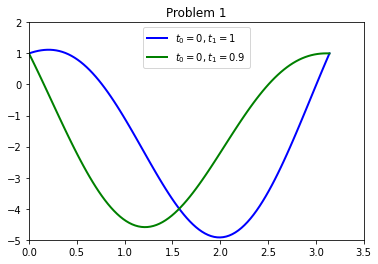

In [8]:
# Define the interval and parameters
X = np.linspace(0, np.pi, 100)
Y = solveSecant(ode, X, 0, np.pi, 1, 1, 0, 1, 40)
Y2 = solveSecant(ode, X, 0, np.pi, 1, 1, 0, 0.9, 40)

# Plot both of the solutions with different t_1 values
plt.plot(X,Y,'-b',linewidth=2, label='$t_0 = 0, t_1 = 1$')
plt.plot(X,Y2,'-g',linewidth=2, label='$t_0 = 0, t_1 = 0.9$')
plt.legend()
plt.xlim([0,3.5])
plt.ylim([-5,2])
plt.title('Problem 1')
plt.show()

# Problem 2

Use Newton's method to solve the BVP
y
00 = 3 +
2y
x
2
, x ∈ [1, e],
y(1) = 6,
y(e) = e
2 + 6/e.
Plot your solution.

In [9]:
# Redefine the ode() function to solve new BVP
def ode2(y,x):
    return np.array([y[1], 3 + 2*y[0]/x**2])

In [10]:
# Redefine the interval and the parameters
X = np.linspace(1, np.e, 100)
Y = solveSecant(ode2, X, 1, np.e, 6, np.e**2 + 6/np.e, (np.e**2 + 6/np.e - 6)/(np.e - 1), 1, 40)

# Plot the solution
plt.plot(X,Y,'-b',linewidth=2)
plt.xlim([1,2.8])
plt.ylim([4,10])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Problem 1')
plt.show()

# Problem 3

Suppose a projectile is fired from a cannon with velocity 45 m/s2
. At what angle
θ(0) should it be fired to land at a distance of 195 m?
There should be two initial angles θ(0) that produce a solution for this bvp. Use the
secant method to numerically compute and then plot both trajectories.
dy
dx = tan θ,
dv
dx = −
g sin θ + µv2
v cos θ
,
dθ
dx = −
g
v
2
,
y(0) = y(195) = 0,
v(0) = 45 m/s2
(20.8)
(g = 9.8067 m/s2
.) Find and plot both solutions for this boundary value problem when µ = .0003.
Compare with the solutions when µ = 0.

In [13]:
def ode3(y,theta):
    return np.array([np.tan(theta),
                    (g*np.sin(theta) + mu*v**2)/(v*np.cos(theta)),
                    -1*g/v**2])

In [ ]:
g = 9.8067
v = 45
t0 = 0
t1 = 195
maxI = 40
mu = 0.0003

In [ ]:
# Redefine the interval and the parameters
X = np.linspace(0, 200, 400)
Y = solveSecant(ode3, X, 0, 200, 0, np.pi/3, t0, t1, maxI)
